# Resampling
Resampling in NCDL is explicit. If you want to go up or down in resolution, you NEED to use the resampling functionality. This is a design choice that we made to simplify the implementation; we may change this in the future.

There's a second pedagogical reason for this; resampling is actually a *dangerous* operation. I mean this somewhat figuratively and literally. From a signal processing perspective, naively downsampling ***will*** introduce aliasing, and we want the user to be aware of this (the same is also true for upsampling).

Ultimiately it's up to you (currently) to anti-alias your resampling operations, many convolutional networks get away with this, but it's always something to be aware of.

We start with our running example on the quincunx lattice.

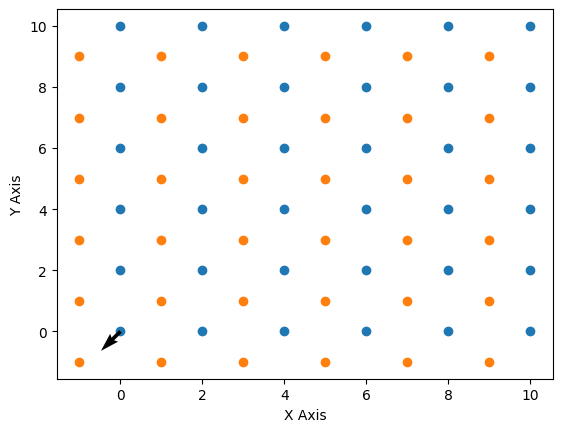

In [1]:
import ncdl
import torch
import numpy as np
from ncdl import Lattice, LatticeTensor
from utility import visualize_lattice


qc = Lattice("qc")

blue_coset = torch.rand(4, 3, 6, 6)
orange_coset = torch.rand(4, 3, 6, 6)

lt = qc({
    (0,0): blue_coset, 
    (-1,-1): orange_coset
}) 

visualize_lattice(lt)

Let's start with a simple example, downsampling by a factor of 2 in each axis (a dyadic downsample). The expectaction would to discard points on the blue coset, so that it becomes a new quincunx lattice.

In [2]:
from ncdl.nn.functional.downsample import downsample

S = np.array([
    [2,0],
    [0,2]
], dtype='int')

ltd = downsample(lt, S)

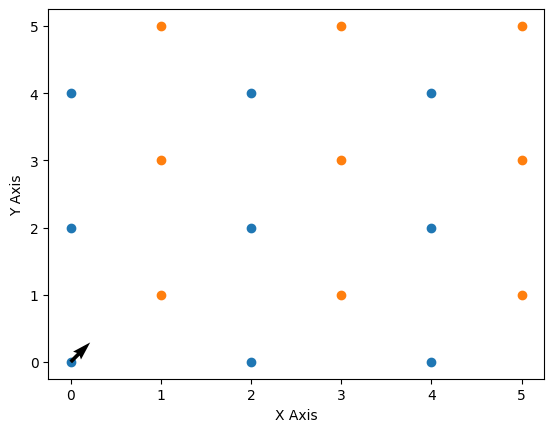

In [3]:
visualize_lattice(ltd)

Which is exactly what we get. There's an additional slight subtlety here. Let's upsample to see this.

In [4]:
from ncdl.nn.functional.upsample import upsample

ltu = upsample(ltd, S)

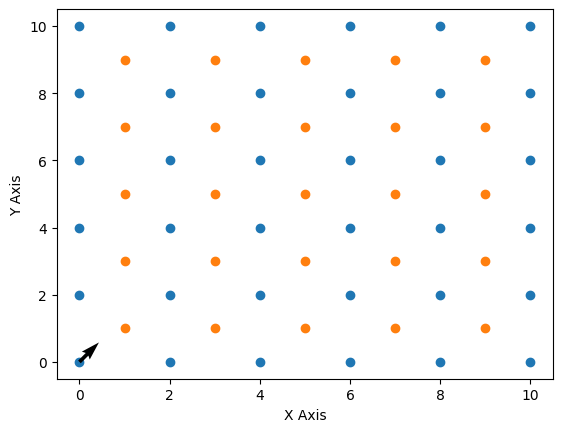

In [5]:
visualize_lattice(ltu)

Upsampling respects the boundary of the input region, but notice how points on the left have disappeared! When we downsample, we lose this information. We can use the pad_like function to ensure that we get a compatible lattice tensor back.

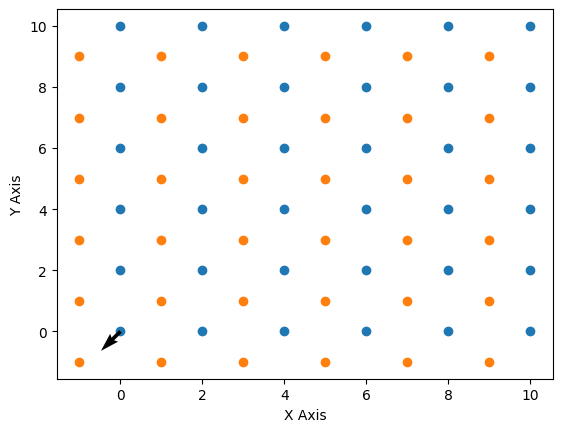

In [24]:
from ncdl import pad_like

lt_restored = pad_like(ltu, lt) #, left_alignment=(False, False)) # I used left alignment here, which fixes the comment below, but this needs to be more clear.
visualize_lattice(lt_restored)

Not exactly the same region, but these are compatible lattice tensors. (TODO: This should actually respect the input lattice tensor's shifts, I think this is subtly wrong, here.)

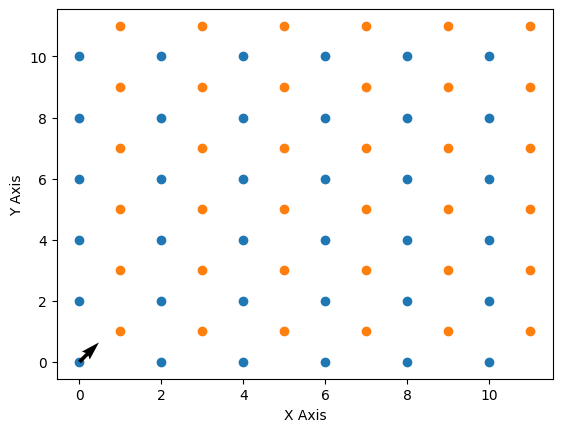

In [15]:
visualize_lattice(lt_restored + lt)

See? Let's move on to something more exotic. A non-dyadic example. This is the main example in the NCDL paper.

In [16]:
S = np.array([
    [-1,1],
    [1,1]
], dtype='int')

ltd1 = downsample(lt, S)

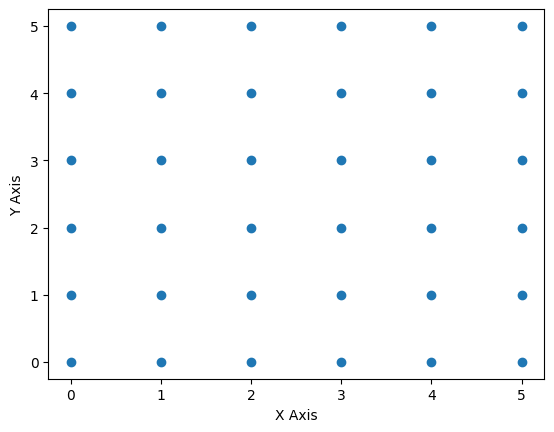

In [17]:
visualize_lattice(ltd1)

One application of this downsampling gives a cartesian lattice.

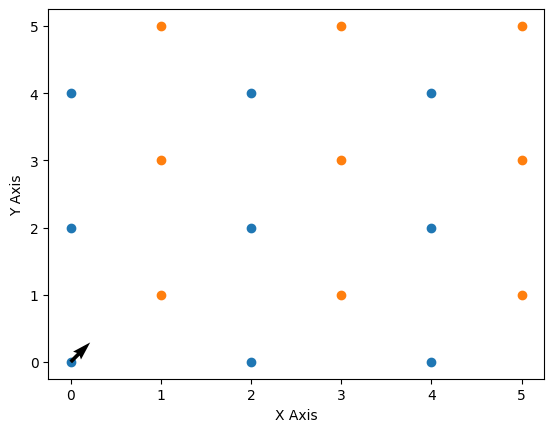

In [18]:
ltd2 = downsample(ltd1, S)
visualize_lattice(ltd2)

A second application returns us to a quincux lattice. Of course we can go back up, too.

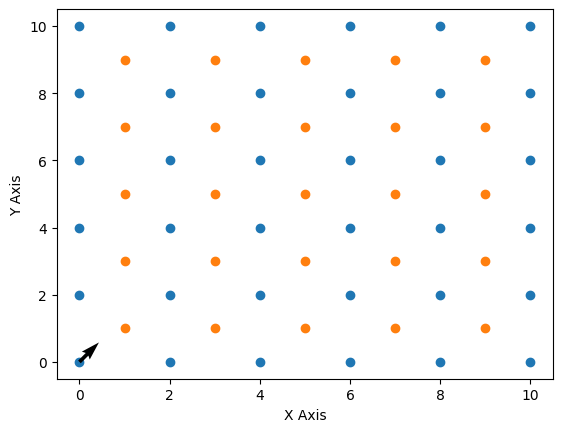

In [20]:
lto = upsample(upsample(ltd2, S), S)
visualize_lattice(lto)